<a href="https://colab.research.google.com/github/Ayush-man-19/Chatbot/blob/main/Movie_Recommendation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
coulumns_name=['user_id','item_id','rating','timestamp']
df=pd.read_csv('ml-100k/u.data', sep='\t',names=coulumns_name)

In [ ]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
df.shape

(100000, 4)

In [ ]:
df['user_id']
print(len(df['user_id']))

100000


In [ ]:
df['user_id'].nunique()

943

In [ ]:
df['item_id'].nunique()

1682

In [ ]:
movies_title=pd.read_csv('ml-100k/u.item',sep='|',encoding='latin-1',header=None)

In [ ]:
movies_title=movies_title[[0,1]]
movies_title.columns=['item_id','Title']

In [ ]:
movies_title.head()

,item_id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
len('Title')

5

In [ ]:
df=pd.merge(df,movies_title,on='item_id')

In [ ]:
df['Title'].nunique()

1664

In [ ]:
df.tail()

,user_id,item_id,rating,timestamp,Title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
sns.set_style?

In [ ]:
df

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [ ]:
df.groupby('Title').mean()['rating'].sort_values(ascending=False).head()

Title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [ ]:
df.groupby('Title').count()['rating'].sort_values(ascending=False)

Title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [ ]:
rating=pd.DataFrame(df.groupby('Title').mean()['rating'])

In [ ]:
rating

,rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [ ]:
rating['no of ratings']=pd.DataFrame(df.groupby('Title').count()['rating'])

In [ ]:
rating

,rating,no of ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [ ]:
rating.sort_values(by='rating',ascending=False).head(n=10)

,rating,no of ratings
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


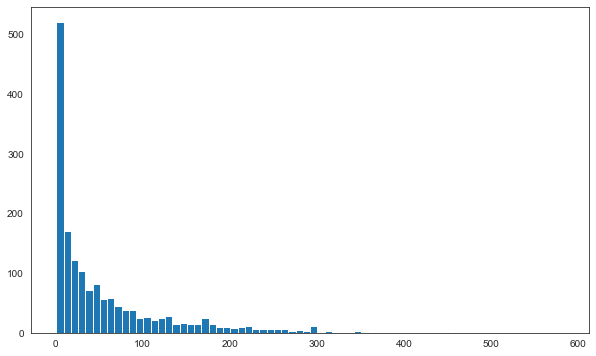

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(rating['no of ratings'],bins=70)
plt.show()

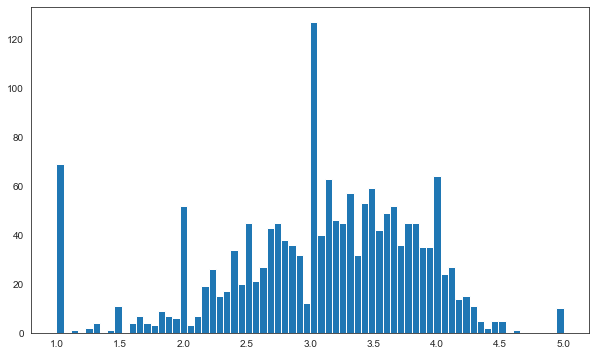

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(rating['rating'],bins=70)
plt.show()

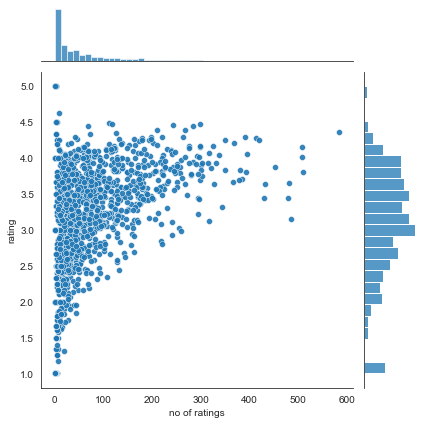

In [ ]:
sns.jointplot(rating['no of ratings'],rating['rating'],data=rating,alpha=0.9)

# CREATING MOVIE RECOMMENDATION

In [ ]:
df.head()

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
Movie_Matrix=df.pivot_table(index='user_id',columns='Title',values='rating')

In [ ]:
Movie_Matrix.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [ ]:
rating.sort_values(by="no of ratings",ascending=False)

,rating,no of ratings
Title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [ ]:
starwars_user_rating=Movie_Matrix['Star Wars (1977)']

In [ ]:
starwars_user_rating

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [ ]:
similar_to_starwars=Movie_Matrix.corrwith(starwars_user_rating)

In [ ]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [ ]:
corr_starwars.dropna(inplace=True)

In [ ]:
corr_starwars.head()

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [ ]:
corr_starwars.sort_values(by='Correlation',ascending=False).head(10)

,Correlation
Title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [ ]:
c_starwars=corr_starwars.join(rating['no of ratings'])

In [ ]:
c_starwars.head()

,Correlation,no of ratings
Title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [ ]:
corr_starwars=c_starwars[c_starwars['no of ratings']>100]

In [ ]:
corr_starwars.sort_values(by='Correlation',ascending=False).head(10)

,Correlation,no of ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


# PREDICT FUNCTION

In [ ]:
def predict_movies(movie_name):
    movie_user_rating=Movie_Matrix[movie_name]
    similar_to_movie=Movie_Matrix.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    c_movie=corr_movie.join(rating['no of ratings'])
    predictions=c_movie[c_movie['no of ratings']>100].sort_values(by='Correlation',ascending=False)
    
    return predictions

In [ ]:
predictions=predict_movies('Star Wars (1977)')

In [ ]:
predictions.head()

,Correlation,no of ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
